<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/TX_Labeling_CDC_Guideline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

* This colab is for labeling CA data from combined datasets and maryland intertia dataset following CDC guideline 



In [1]:
# Task 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=0c27f2db6e3940e911c646157f27c51f79c734e12bd3a56eaef90db99422a6af
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [5]:
!ls  '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021'

 CA_alldatasets_Feb05.csv
 CA_alldatasets_Jan13.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb05.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb06.csv
 CA_CombinedData_Labeled_CDCGuideline_Jan15.csv
 CA_combined_Feb04.csv
 CA_CovidDataJan10.csv
 CA_GoogleMobilityDataJan10.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb05.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb06.csv
 CA_MarylandData_Labeled_CDCGuideline_Jan15.csv
 CA_processedMarylandData_Feb04.csv
 CA_processedMarylandData_Feb05.csv
 CA_processedMarylandData_Jan11.csv
 CA_SocialDistancingDataJan10.csv
 CA_socialDistancingInertiaData_Feb04.csv
 computed_CA_mobility_data.csv
 data-mask_for_all.csv
 election_results_2021.csv
 maryland_inertia_data_allstates_Feb04.csv
 maryland_inertia_data_allstates_Feb05.csv
 maryland_inertia_data_allstates_Jan11.csv
 maryland_inertia_raw_dec28_2020.csv
 Mask_Rule_Feb05.csv
 Mask_Rule_Jan10.csv
 NY_alldatasets_Jan13.csv
 NY_CombinedData_Labeled_CDCGuideline_Feb07.csv
 NY_CombinedData_Labeled_CDCGuideli

### Location

In [6]:
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/'

# Load Combined Dataset

## Data Preprocessing

In [7]:
TX_combined_data = pd.read_csv(location+'TX_alldatasets_Jan11.csv',low_memory=False)
TX_combined_data.head()

Date  ... residential_percent_change_from_baseline
0  2020-03-01  ...                                      0.0
1  2020-03-02  ...                                     -1.0
2  2020-03-03  ...                                     -2.0
3  2020-03-04  ...                                      2.0
4  2020-03-05  ...                                     -3.0

[5 rows x 15 columns]

## 'New Cases/100k population'

In [8]:
TX_combined_data['New Cases/100k population'] = TX_combined_data['New cases']*100000/ TX_combined_data['population']
TX_combined_data.tail(2)

Date  ... New Cases/100k population
53461  2021-01-04  ...                  0.000000
53462  2021-01-05  ...                827.702703

[2 rows x 16 columns]

## Computing rolling average

In [9]:
TX_combined_data.columns

Index(['Date', 'Province_State', 'FIPS', 'New cases', 'County Name',
       'population', 'mask_rule_active', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'New Cases/100k population'],
      dtype='object')

In [10]:
col_idx = TX_combined_data.columns.get_loc("New Cases/100k population")
print(col_idx)

15


15 no column  = New Cases/100k population

In [11]:
TX_combined_data.iloc[:,col_idx]

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
53458     84.459459
53459     42.229730
53460      0.000000
53461      0.000000
53462    827.702703
Name: New Cases/100k population, Length: 53463, dtype: float64

### Filter CA

In [12]:
TX_combined_data = TX_combined_data.loc[TX_combined_data['Province_State'] == 'Texas']
TX_combined_data.reset_index(drop=True)

Date  ... New Cases/100k population
0      2020-03-01  ...                  0.000000
1      2020-03-02  ...                  0.000000
2      2020-03-03  ...                  0.000000
3      2020-03-04  ...                  0.000000
4      2020-03-05  ...                  0.000000
...           ...  ...                       ...
53458  2020-12-30  ...                 84.459459
53459  2020-12-31  ...                 42.229730
53460  2021-01-01  ...                  0.000000
53461  2021-01-04  ...                  0.000000
53462  2021-01-05  ...                827.702703

[53463 rows x 16 columns]

In [13]:
TX_combined_data.columns

Index(['Date', 'Province_State', 'FIPS', 'New cases', 'County Name',
       'population', 'mask_rule_active', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'New Cases/100k population'],
      dtype='object')

old

['Date', 'Province_State', 'FIPS','County Name','population',
                           'retail and recreation','grocery and pharmacy', 'parks', 'transit stations', 'workplaces',
       'residential', 'driving', 'm50', 'm50_index', 'population_density',
       'mask_rule_active', 'mask_wearing_percent', 'New cases',
       'New Cases/100k population', 'countyFIPS', 'State',
       'county_population','rolling_avg_new_cases/100k']

In [14]:
df = pd.DataFrame(columns=['Date', 'Province_State', 'FIPS','County Name','population',
                           'mask_rule_active', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'New Cases/100k population','rolling_avg_new_cases/100k'])


In [15]:
col_idx = TX_combined_data.columns.get_loc("New Cases/100k population")
print(col_idx)

15


In [16]:
CA_counties = TX_combined_data['County Name'].unique()

for county in CA_counties:
  county_data = TX_combined_data[TX_combined_data['County Name'] == county]
  #print(county_data.iloc[:,15])
  county_data['rolling_avg_new_cases/100k'] = county_data.iloc[:,col_idx].rolling(window=7).mean()
  df = df.append(county_data)

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date Province_State  ... rolling_avg_new_cases/100k New cases
0  2020-03-01          Texas  ...                        NaN       0.0
1  2020-03-02          Texas  ...                        NaN       0.0
2  2020-03-03          Texas  ...                        NaN       0.0
3  2020-03-04          Texas  ...                        NaN       0.0
4  2020-03-05          Texas  ...                        NaN       0.0

[5 rows x 17 columns]

In [17]:
print(df.shape)
TX_combined_data.shape

(53463, 17)


(53463, 16)

In [18]:
TX_combined_data = df.copy()
TX_combined_data

Date Province_State  ... rolling_avg_new_cases/100k New cases
0      2020-03-01          Texas  ...                        NaN       0.0
1      2020-03-02          Texas  ...                        NaN       0.0
2      2020-03-03          Texas  ...                        NaN       0.0
3      2020-03-04          Texas  ...                        NaN       0.0
4      2020-03-05          Texas  ...                        NaN       0.0
...           ...            ...  ...                        ...       ...
53458  2020-12-30          Texas  ...                  59.121622      10.0
53459  2020-12-31          Texas  ...                  61.534749       5.0
53460  2021-01-01          Texas  ...                  22.924710       0.0
53461  2021-01-04          Texas  ...                  22.924710       0.0
53462  2021-01-05          Texas  ...                 139.961390      98.0

[53463 rows x 17 columns]

In [19]:
TX_combined_data[TX_combined_data['Date'] == '2020-08-01'].head(4)

Date Province_State  ... rolling_avg_new_cases/100k New cases
151   2020-08-01          Texas  ...                  17.073080      13.0
445   2020-08-01          Texas  ...                  22.912132       0.0
720   2020-08-01          Texas  ...                  39.867876      41.0
1020  2020-08-01          Texas  ...                  18.229325       0.0

[4 rows x 17 columns]

## clean data - fill NA 

In [20]:
TX_combined_data = TX_combined_data.fillna(0)
TX_combined_data.head(8)

Date Province_State  ...  rolling_avg_new_cases/100k New cases
0  2020-03-01          Texas  ...                         0.0       0.0
1  2020-03-02          Texas  ...                         0.0       0.0
2  2020-03-03          Texas  ...                         0.0       0.0
3  2020-03-04          Texas  ...                         0.0       0.0
4  2020-03-05          Texas  ...                         0.0       0.0
5  2020-03-06          Texas  ...                         0.0       0.0
6  2020-03-07          Texas  ...                         0.0       0.0
7  2020-03-08          Texas  ...                         0.0       0.0

[8 rows x 17 columns]

## Labeling: Apply CDC Guideline for all counties

https://edsource.org/2020/quick-guide-what-californias-color-coded-county-tracking-system-means-for-schools/639357

In [21]:
county_names = TX_combined_data['County Name'].unique()

In [22]:
county_names

array(['Anderson County', 'Andrews County', 'Angelina County',
       'Aransas County', 'Archer County', 'Atascosa County',
       'Austin County', 'Bailey County', 'Bandera County',
       'Bastrop County', 'Bee County', 'Bell County', 'Bexar County',
       'Blanco County', 'Bosque County', 'Bowie County',
       'Brazoria County', 'Brazos County', 'Brewster County',
       'Brooks County', 'Brown County', 'Burleson County',
       'Burnet County', 'Caldwell County', 'Calhoun County',
       'Callahan County', 'Cameron County', 'Camp County',
       'Carson County', 'Cass County', 'Castro County', 'Chambers County',
       'Cherokee County', 'Childress County', 'Clay County',
       'Coleman County', 'Collin County', 'Colorado County',
       'Comal County', 'Comanche County', 'Cooke County',
       'Coryell County', 'Crane County', 'Crockett County',
       'Culberson County', 'Dallam County', 'Dallas County',
       'Dawson County', 'Deaf Smith County', 'Delta County',
       'Dent

In [23]:
TX_combined_data[TX_combined_data['County Name']== 'Anderson County'].population.unique()[0]

57735

In [24]:
TX_combined_data[TX_combined_data['population'] < 300000]['County Name'].shape

(48063,)

* Widespread (purple): Counties with more than 7 daily new cases per 100,000 residents or higher than 8% positivity rate
* Substantial (red): 4 to 7 daily new cases per 100,000 residents or 5-8% positivity
* Moderate (orange): 1 to 3.9 daily new cases per 100,000 or 2-4.9% positivity
* Minimal (yellow): Less than 1 daily new case per 100,000 or less than 2% positivity

In [25]:
for county in county_names:
    print('county name: ',county)
    county_population = TX_combined_data[TX_combined_data['County Name']== county].population.unique()[0]
    county_data = TX_combined_data[TX_combined_data['County Name']== county]
    new_cases_100k_la_list = county_data['New Cases/100k population'].values
    #rolling_avg_new_cases/100k_list = county_data['rolling_avg_new_cases/100k'].values
    

    diffArr = np.diff(new_cases_100k_la_list)
    growth_values =[]
    growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    
    growth_values.extend(diffArr)
    county_data['growth_values'] = growth_values

    minVal = np.min(growth_values)
    maxVal = np.max(growth_values)
    meanVal= np.mean(growth_values, axis=0)
    stdVal = np.std(growth_values, axis=0)

#implementing cdc guideline-CA color code
#Widespread (purple): Counties with more than 7 daily new cases per 100,000 residents or higher than 8% positivity rate
#Substantial (red): 4 to 7 daily new cases per 100,000 residents or 5-8% positivity
#Moderate (orange): 1 to 3.9 daily new cases per 100,000 or 2-4.9% positivity
#Minimal (yellow): Less than 1 daily new case per 100,000 or less than 2% positivity
    for index, row in (county_data.iterrows()):
      i = row['rolling_avg_new_cases/100k']
      '''
      if i > 7 :
        label = 'widespread'
      elif (i <= 7) and (i >= 4):
        label = 'substantial'
      elif (i < 4) and (i >= 1):
        label = 'moderate'
      elif i < 1 :
        label = 'minimal'
      '''
      #new labeling from CA
      if i > 77 :
        label = 'widespread'
      elif (i <= 77) and (i >= 27):
        label = 'substantial'
      elif (i < 27) and (i >= 7):
        label = 'moderate'
      elif i < 7 :
        label = 'minimal'  
          
    
      date = row['Date']
      #print(i,county, date, label)

      df_index = (TX_combined_data['County Name'] == county) & (TX_combined_data['Date'] == date) 
      #print(df_weekData)
      TX_combined_data.loc[df_index,'growth_label'] = label
    #break

county name:  Anderson County


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


county name:  Andrews County
county name:  Angelina County
county name:  Aransas County
county name:  Archer County
county name:  Atascosa County
county name:  Austin County
county name:  Bailey County
county name:  Bandera County
county name:  Bastrop County
county name:  Bee County
county name:  Bell County
county name:  Bexar County
county name:  Blanco County
county name:  Bosque County
county name:  Bowie County
county name:  Brazoria County
county name:  Brazos County
county name:  Brewster County
county name:  Brooks County
county name:  Brown County
county name:  Burleson County
county name:  Burnet County
county name:  Caldwell County
county name:  Calhoun County
county name:  Callahan County
county name:  Cameron County
county name:  Camp County
county name:  Carson County
county name:  Cass County
county name:  Castro County
county name:  Chambers County
county name:  Cherokee County
county name:  Childress County
county name:  Clay County
county name:  Coleman County
county

In [26]:
print(TX_combined_data[TX_combined_data['growth_label'] == 'widespread'].shape)
print(TX_combined_data[TX_combined_data['growth_label'] == 'substantial'].shape)
print(TX_combined_data[TX_combined_data['growth_label'] == 'moderate'].shape)
print(TX_combined_data[TX_combined_data['growth_label'] == 'minimal'].shape)


(2956, 18)
(9913, 18)
(15991, 18)
(24603, 18)


In [27]:
#to show all rows
pd.set_option('display.max_rows', None)

In [28]:
TX_combined_data.groupby(['County Name','growth_label']).size().reset_index(name='row_count').sort_values(by=['County Name','growth_label','row_count'], ascending=False)

County Name growth_label  row_count
768         Zavala County   widespread         18
767         Zavala County  substantial         66
766         Zavala County     moderate         31
765         Zavala County      minimal         90
764         Zapata County   widespread         14
763         Zapata County  substantial         30
762         Zapata County     moderate         54
761         Zapata County      minimal        107
760          Young County   widespread         23
759          Young County  substantial         79
758          Young County     moderate         56
757          Young County      minimal        117
756         Yoakum County   widespread         26
755         Yoakum County  substantial         46
754         Yoakum County     moderate         43
753         Yoakum County      minimal         89
752           Wood County   widespread          7
751           Wood County  substantial         47
750           Wood County     moderate         93
749           Wood County      minimal        147
748           Wise County   widespread         31
747           Wise County  substantial         25
746           Wise County     moderate         89
745           Wise County      minimal        150
744        Winkler County   widespread         35
743        Winkler County  substantial         21
742        Winkler County     moderate         89
741        Winkler County      minimal        130
740         Wilson County   widespread          9
739         Wilson County  substantial         28
738         Wilson County     moderate         80
737         Wilson County      minimal        177
736     Williamson County   widespread          2
735     Williamson County  substantial         40
734     Williamson County     moderate         83
733     Williamson County      minimal        175
732        Willacy County   widespread          7
731        Willacy County  substantial         90
730        Willacy County     moderate         62
729        Willacy County      minimal        116
728      Wilbarger County   widespread         46
727      Wilbarger County  substantial         42
726      Wilbarger County     moderate         39
725      Wilbarger County      minimal        138
724        Wichita County   widespread         30
723        Wichita County  substantial         51
722        Wichita County     moderate        110
721        Wichita County      minimal        109
720        Wheeler County      minimal          1
719        Wharton County   widespread          5
718        Wharton County  substantial         78
717        Wharton County     moderate         76
716        Wharton County      minimal        135
715           Webb County   widespread         30
714           Webb County  substantial         98
713           Webb County     moderate         65
712           Webb County      minimal        107
711     Washington County  substantial         45
710     Washington County     moderate        110
709     Washington County      minimal        120
708           Ward County   widespread         31
707           Ward County  substantial         23
706           Ward County     moderate         81
705           Ward County      minimal        140
704         Waller County  substantial         31
703         Waller County     moderate        114
702         Waller County      minimal        149
701         Walker County   widespread         12
700         Walker County  substantial         75
699         Walker County     moderate        123
698         Walker County      minimal         84
697       Victoria County   widespread         23
696       Victoria County  substantial         46
695       Victoria County     moderate        112
694       Victoria County      minimal        119
693      Van Zandt County   widespread          6
692      Van Zandt County  substantial         45
691      Van Zandt County     moderate         84
690      Van Zandt County      minimal        159
689      Val V

## Verifying with plot

['minimal' 0 'moderate' 1 'substantial' 2]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


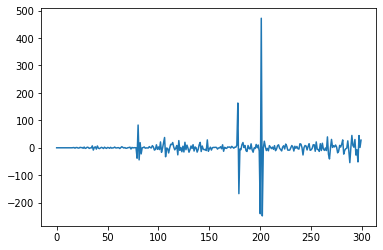

(0, 19)


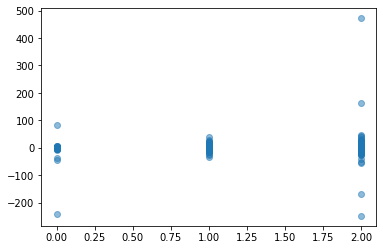

In [29]:
alameda_data = TX_combined_data[TX_combined_data['County Name'] == 'Brazos County']

new_cases_100k_la_list = alameda_data['New Cases/100k population'].values
diffArr = np.diff(new_cases_100k_la_list)
growth_values =[]
growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    
growth_values.extend(diffArr)

alameda_data['growth_code'] = alameda_data['growth_label'].astype('category').cat.codes
print(pd.unique(alameda_data[['growth_label', 'growth_code']].values.ravel()))
new_cases_100k_la_list = alameda_data['New Cases/100k population'].values
plt.plot(growth_values)
plt.show()
alameda_labelflat_growth = alameda_data[alameda_data['growth_label'] == 'widespread']
print(alameda_labelflat_growth.shape)
#alameda_labelflat_growth

N = 5
x = alameda_data['growth_code'].values
y = growth_values #alameda_data['New Cases/1k population'].values
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()


Using rolling_avg_new_cases/100k

['minimal' 0 'moderate' 1 'substantial' 2]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


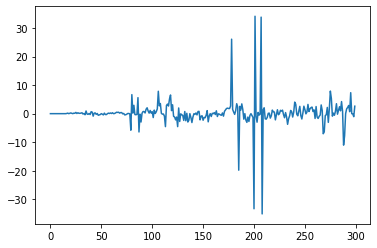

(0, 19)


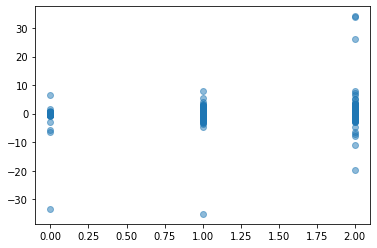

In [30]:
alameda_data = TX_combined_data[TX_combined_data['County Name'] == 'Brazos County']

rollavg_new_cases_100k_la_list = alameda_data['rolling_avg_new_cases/100k'].values
diffArr = np.diff(rollavg_new_cases_100k_la_list)
growth_values =[]
growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    
growth_values.extend(diffArr)

alameda_data['growth_code'] = alameda_data['growth_label'].astype('category').cat.codes
print(pd.unique(alameda_data[['growth_label', 'growth_code']].values.ravel()))
rollavg_new_cases_100k_la_list = alameda_data['rolling_avg_new_cases/100k'].values
plt.plot(growth_values)
plt.show()
alameda_labelflat_growth = alameda_data[alameda_data['growth_label'] == 'widespread']
print(alameda_labelflat_growth.shape)
#alameda_labelflat_growth

N = 5
x = alameda_data['growth_code'].values
y = growth_values #alameda_data['New Cases/1k population'].values
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()

## verifying Rolling average with visualizations -Los Angeles County

http://dashboard.publichealth.lacounty.gov/covid19_surveillance_dashboard/

In [31]:
TX_combined_data.Date.unique()

array(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-

In [32]:
date_list_aug = ['2020-08-01',
       '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
       '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
       '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
       '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
       '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21']

date_list = ['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
       '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
       '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
       '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
       '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
       '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
       '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
       '2020-07-29', '2020-07-30', '2020-07-31']

### ['minimal' 0 'moderate' 1 'substantial' 2 'widespread' 3]

widespread

In [33]:
TX_combined_data[(TX_combined_data['County Name'] == 'Brazos County') & (TX_combined_data['growth_label'] == 'widespread')]['Date'].unique()

array([], dtype=object)

substantial

In [34]:
TX_combined_data[(TX_combined_data['County Name'] == 'Brazos County') & (TX_combined_data['growth_label'] == 'substantial')]['Date'].unique()

array(['2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
       '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
       '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03',
       '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
       '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
       '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15',
       '2020-07-16', '2020-08-28', '2020-08-29', '2020-08-30',
       '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03',
       '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07',
       '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
       '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15',
       '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-20',
       '2020-09-21', '2020-09-26', '2020-09-29', '2020-11-08',
       '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
       '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
       '2020-11-17', '2020-11-18', '2020-11-19', '2020-

moderate

In [35]:
TX_combined_data[(TX_combined_data['County Name'] == 'Brazos County') & (TX_combined_data['growth_label'] == 'moderate')]['Date'].unique()

array(['2020-05-23', '2020-05-24', '2020-05-27', '2020-06-06',
       '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
       '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
       '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
       '2020-06-23', '2020-06-24', '2020-06-25', '2020-07-17',
       '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
       '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
       '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
       '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02',
       '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
       '2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10',
       '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
       '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18',
       '2020-08-19', '2020-08-21', '2020-08-22', '2020-08-23',
       '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27',
       '2020-09-22', '2020-09-23', '2020-09-24', '2020-

minimal

In [36]:
TX_combined_data[(TX_combined_data['County Name'] == 'Brazos County') & (TX_combined_data['growth_label'] == 'minimal')]['Date'].unique()

array(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-

### Other

In [37]:
los_angeles_county = TX_combined_data[(TX_combined_data['County Name'] == 'Brazos County') & TX_combined_data['Date'].isin(date_list)]
print(los_angeles_county.shape)
los_angeles_county.head()

(31, 18)


Date Province_State  ...  New cases growth_label
4780  2020-07-01          Texas  ...      122.0  substantial
4781  2020-07-02          Texas  ...      101.0  substantial
4782  2020-07-03          Texas  ...      103.0  substantial
4783  2020-07-04          Texas  ...       70.0  substantial
4784  2020-07-05          Texas  ...       83.0  substantial

[5 rows x 18 columns]

In [38]:
los_angeles_county.growth_label.unique()

array(['substantial', 'moderate'], dtype=object)

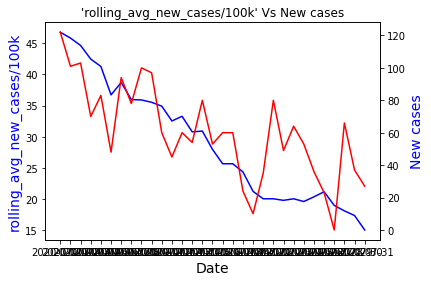

In [39]:
fig,ax = plt.subplots()
# make a plot
ax.plot(los_angeles_county.Date, los_angeles_county['rolling_avg_new_cases/100k'], color="blue")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("rolling_avg_new_cases/100k",color="blue",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(los_angeles_county.Date, los_angeles_county["New cases"],color="red")
ax2.set_ylabel("New cases",color="blue",fontsize=14)
plt.title("'rolling_avg_new_cases/100k' Vs New cases")
plt.xticks(rotation=90)
plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text major ticklabel objects>)

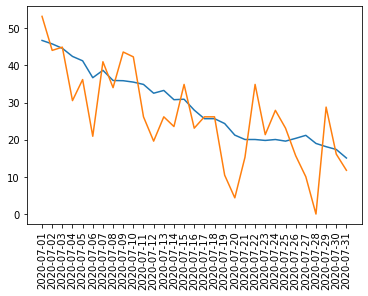

In [40]:
x = los_angeles_county['Date']
y1 = los_angeles_county['rolling_avg_new_cases/100k'] 
y2 = los_angeles_county['New Cases/100k population']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


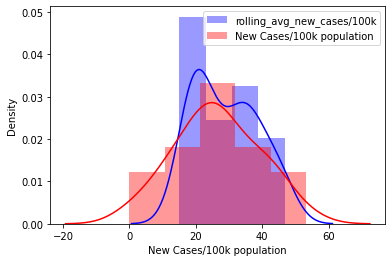

In [41]:
sns.distplot( (los_angeles_county['rolling_avg_new_cases/100k'] ) , color="blue", label='rolling_avg_new_cases/100k')
sns.distplot( los_angeles_county['New Cases/100k population'] , color="red", label='New Cases/100k population')
plt.legend()
 
plt.show()

## Angelina County

https://rivcoph.org/coronavirus

In [42]:
suffolk_county = TX_combined_data[TX_combined_data['County Name'] == 'Angelina County']

### ['minimal' 0 'moderate' 1 'substantial' 2 'widespread' 3]

widespread

In [43]:
TX_combined_data[(TX_combined_data['County Name'] == 'Angelina County') & (TX_combined_data['growth_label'] == 'widespread')]['Date'].unique()

array(['2020-07-28', '2020-11-01', '2020-11-02', '2020-11-03',
       '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07',
       '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22',
       '2020-12-23', '2020-12-24', '2020-12-25', '2021-01-01',
       '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05'],
      dtype=object)

substantial

In [44]:
TX_combined_data[(TX_combined_data['County Name'] == 'Angelina County') & (TX_combined_data['growth_label'] == 'substantial')]['Date'].unique()

array(['2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14',
       '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18',
       '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
       '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
       '2020-07-27', '2020-07-29', '2020-07-30', '2020-07-31',
       '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
       '2020-08-05', '2020-08-07', '2020-11-16', '2020-11-17',
       '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
       '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
       '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
       '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
       '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
       '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
       '2020-12-30', '2020-12-31'], dtype=object)

moderate

In [45]:
TX_combined_data[(TX_combined_data['County Name'] == 'Angelina County') & (TX_combined_data['growth_label'] == 'moderate')]['Date'].unique()

array(['2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
       '2020-05-21', '2020-06-03', '2020-06-10', '2020-06-11',
       '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15',
       '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
       '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
       '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27',
       '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01',
       '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
       '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
       '2020-07-10', '2020-08-06', '2020-08-08', '2020-08-09',
       '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
       '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
       '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-28',
       '2020-08-29', '2020-09-01', '2020-09-02', '2020-09-03',
       '2020-09-11', '2020-09-12', '2020-09-13', '2020-

minimal

In [46]:
TX_combined_data[(TX_combined_data['County Name'] == 'Angelina County') & (TX_combined_data['growth_label'] == 'minimal')]['Date'].unique()

array(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-

### Other

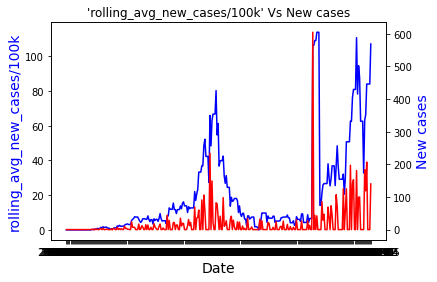

In [47]:
fig,ax = plt.subplots()
# make a plot
ax.plot(suffolk_county.Date, suffolk_county['rolling_avg_new_cases/100k'], color="blue")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("rolling_avg_new_cases/100k",color="blue",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(suffolk_county.Date, suffolk_county["New cases"],color="red")
ax2.set_ylabel("New cases",color="blue",fontsize=14)
plt.title("'rolling_avg_new_cases/100k' Vs New cases")

plt.show()

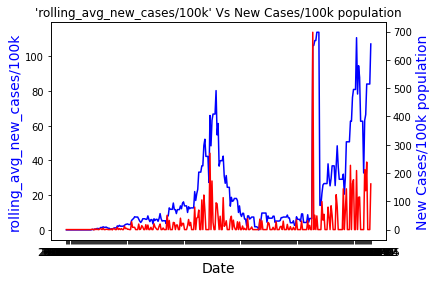

In [48]:
fig,ax = plt.subplots()
# make a plot
ax.plot(suffolk_county.Date, suffolk_county['rolling_avg_new_cases/100k'], color="blue")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("rolling_avg_new_cases/100k",color="blue",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(suffolk_county.Date, suffolk_county["New Cases/100k population"],color="red")
ax2.set_ylabel("New Cases/100k population",color="blue",fontsize=14)
plt.title("'rolling_avg_new_cases/100k' Vs New Cases/100k population")

plt.show()

## Export to CSV file to drive

In [49]:
print(TX_combined_data[TX_combined_data['growth_label'] == 'widespread'].shape)
print(TX_combined_data[TX_combined_data['growth_label'] == 'substantial'].shape)
print(TX_combined_data[TX_combined_data['growth_label'] == 'moderate'].shape)
print(TX_combined_data[TX_combined_data['growth_label'] == 'minimal'].shape)

(2956, 18)
(9913, 18)
(15991, 18)
(24603, 18)


In [50]:
from datetime import datetime
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/'
filename = 'TX_CombinedData_Labeled_CDCGuideline_'+datetime.now().strftime("%b%d")+'.csv' #%Y%m%d
print(filename)
TX_combined_data.to_csv(location+filename,index=False)

TX_CombinedData_Labeled_CDCGuideline_Feb07.csv


# 2. Loading Maryland Inertia

In [51]:
maryland_sd_inertia = pd.read_csv(location+'TX_processedMarylandData_Jan11.csv',low_memory=False)
maryland_sd_inertia.head()


countyFIPS      County Name  ... Cumulative.inflation.rate  COVID.death.rate
0       48001  Anderson County  ...                       0.2               0.0
1       48001  Anderson County  ...                       0.2               0.0
2       48001  Anderson County  ...                       0.2               0.0
3       48001  Anderson County  ...                       0.2               0.0
4       48001  Anderson County  ...                       0.2               0.0

[5 rows x 47 columns]

## Fixdate column of Social Distancing inertia

In [52]:
#old columns:

old_columns = ['CTFIPS', 'CTNAME', 'STFIPS', 'Social distancing index',
       '% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person', 'New COVID cases', 'Population',
       '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate',
       'COVID death rate']

In [53]:
maryland_sd_inertia.columns

Index(['countyFIPS', 'County Name', 'State', 'population', 'CTFIPS', 'CTNAME',
       'STFIPS', 'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasi

## Filter Data -CA State

In [54]:
maryland_sd_inertia.head(2)

countyFIPS      County Name  ... Cumulative.inflation.rate  COVID.death.rate
0       48001  Anderson County  ...                       0.2               0.0
1       48001  Anderson County  ...                       0.2               0.0

[2 rows x 47 columns]

In [55]:
maryland_sd_inertia.State.unique()

array(['TX'], dtype=object)

## 'New Cases/100k population'

In [56]:
maryland_sd_inertia.head(2)

countyFIPS      County Name  ... Cumulative.inflation.rate  COVID.death.rate
0       48001  Anderson County  ...                       0.2               0.0
1       48001  Anderson County  ...                       0.2               0.0

[2 rows x 47 columns]

In [57]:
maryland_sd_inertia['New Cases/100k population'] = maryland_sd_inertia['New.COVID.cases']*100000/ maryland_sd_inertia['population']
maryland_sd_inertia.tail(2)

countyFIPS    County Name  ... COVID.death.rate  New Cases/100k population
92200       48507  Zavala County  ...             2.21                        0.0
92201       48507  Zavala County  ...             2.21                        0.0

[2 rows x 48 columns]

## Computing rolling average

In [58]:
maryland_sd_inertia.columns

Index(['countyFIPS', 'County Name', 'State', 'population', 'CTFIPS', 'CTNAME',
       'STFIPS', 'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasi

In [59]:
maryland_sd_inertia.shape

(92202, 48)

In [60]:
col_idx = maryland_sd_inertia.columns.get_loc("New Cases/100k population")
print(col_idx)

47


47 no column  = New Cases/100k population

In [61]:
maryland_sd_inertia.iloc[:,col_idx]

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
5           0.000000
6           0.000000
7           0.000000
8           0.000000
9           0.000000
10          0.000000
11          0.000000
12          0.000000
13          0.000000
14          0.000000
15          0.000000
16          0.000000
17          0.000000
18          0.000000
19          0.000000
20          0.000000
21          0.000000
22          0.000000
23          0.000000
24          0.000000
25          0.000000
26          0.000000
27          0.000000
28          0.000000
29          0.000000
30          0.000000
31          0.000000
32          0.000000
33          0.000000
34          0.000000
35          0.000000
36          0.000000
37          0.000000
38          0.000000
39          0.000000
40          0.000000
41          0.000000
42          0.000000
43          0.000000
44          0.000000
45          0.000000
46          0.000000
47          0

In [62]:
maryland_sd_inertia.columns

Index(['countyFIPS', 'County Name', 'State', 'population', 'CTFIPS', 'CTNAME',
       'STFIPS', 'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasi

In [63]:
df = pd.DataFrame(columns=['County Name', 'State', 'population', 'CTFIPS', 'CTNAME','STFIPS',
       'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases', 'Unemployment.claims.1000.people',
       'Unemployment.rate', 'X..working.from.home','Cumulative.inflation.rate',
       'COVID.death.rate', 'New Cases/100k population','rolling_avg_new_cases/100k'])

In [64]:
# for reference; we don't use it
df_old = pd.DataFrame(columns=['State', 'Postal Code', 'STFIPS', 'CTFIPS', 'CTNAME',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate',
       'COVID death rate', 'New Cases/100k population','rolling_avg_new_cases/100k'])


In [65]:
CA_counties = maryland_sd_inertia['CTNAME'].unique()

for county in CA_counties:
  county_data = maryland_sd_inertia[maryland_sd_inertia['CTNAME'] == county]
  #print(county_data.iloc[:,15])
  county_data['rolling_avg_new_cases/100k'] = county_data.iloc[:,col_idx].rolling(window=7).mean()
  df = df.append(county_data)

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


County Name State  ... rolling_avg_new_cases/100k countyFIPS
0  Anderson County    TX  ...                        NaN    48001.0
1  Anderson County    TX  ...                        NaN    48001.0
2  Anderson County    TX  ...                        NaN    48001.0
3  Anderson County    TX  ...                        NaN    48001.0
4  Anderson County    TX  ...                        NaN    48001.0

[5 rows x 49 columns]

In [66]:
print(df.shape)
maryland_sd_inertia.shape

(92202, 49)


(92202, 48)

In [67]:
maryland_sd_inertia = df.copy()
maryland_sd_inertia

In [ ]:
maryland_sd_inertia[maryland_sd_inertia['date'] == '2020-08-01'].head(4)

## clean data - fill NA 

In [ ]:
maryland_sd_inertia = maryland_sd_inertia.fillna(0)
maryland_sd_inertia.head(8)

## Labeling: Apply CDC Guideline for all counties

https://edsource.org/2020/quick-guide-what-californias-color-coded-county-tracking-system-means-for-schools/639357

In [ ]:
county_names = maryland_sd_inertia['CTNAME'].unique()

* Widespread (purple): Counties with more than 7 daily new cases per 100,000 residents or higher than 8% positivity rate
* Substantial (red): 4 to 7 daily new cases per 100,000 residents or 5-8% positivity
* Moderate (orange): 1 to 3.9 daily new cases per 100,000 or 2-4.9% positivity
* Minimal (yellow): Less than 1 daily new case per 100,000 or less than 2% positivity

In [ ]:
for county in county_names:   
    print('county :',county)
    county_population = maryland_sd_inertia[maryland_sd_inertia['CTNAME']== county].Population.unique()[0]
    county_data = maryland_sd_inertia[maryland_sd_inertia['CTNAME']== county]
    new_cases_100k_la_list = county_data['New Cases/100k population'].values
    diffArr = np.diff(new_cases_100k_la_list)
    


    diffArr = np.diff(new_cases_100k_la_list)
    growth_values =[]
    growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    growth_values.extend(diffArr)
    county_data['growth_values'] = growth_values

    minVal = np.min(growth_values)
    maxVal = np.max(growth_values)
    meanVal= np.mean(growth_values, axis=0)
    stdVal = np.std(growth_values, axis=0)

#implementing cdc guideline-CA color code
#Widespread (purple): Counties with more than 7 daily new cases per 100,000 residents or higher than 8% positivity rate
#Substantial (red): 4 to 7 daily new cases per 100,000 residents or 5-8% positivity
#Moderate (orange): 1 to 3.9 daily new cases per 100,000 or 2-4.9% positivity
#Minimal (yellow): Less than 1 daily new case per 100,000 or less than 2% positivity
    for index, row in (county_data.iterrows()):
      i = row['rolling_avg_new_cases/100k']
      '''
      if i > 7 :
        label = 'widespread'
      elif (i <= 7) and (i >= 4):
        label = 'substantial'
      elif (i < 4) and (i >= 1):
        label = 'moderate'
      elif i < 1 :
        label = 'minimal'
        '''
      #labeling from CA
      if i > 69 :
        label = 'widespread'
      elif (i <= 69) and (i >= 19):
        label = 'substantial'
      elif (i < 19) and (i >= 7):
        label = 'moderate'
      elif i < 7 :
        label = 'minimal'
          
    
      date = row['date']
      #print(i,county, date, label)

      df_index = (maryland_sd_inertia['CTNAME'] == county) & (maryland_sd_inertia['date'] == date) 
      #print(df_weekData)
      maryland_sd_inertia.loc[df_index,'growth_label'] = label
    #break

In [ ]:
print(maryland_sd_inertia[maryland_sd_inertia['growth_label'] == 'widespread'].shape)
print(maryland_sd_inertia[maryland_sd_inertia['growth_label'] == 'substantial'].shape)
print(maryland_sd_inertia[maryland_sd_inertia['growth_label'] == 'moderate'].shape)
print(maryland_sd_inertia[maryland_sd_inertia['growth_label'] == 'minimal'].shape)

## Verifying the labeling with plot- Los Angeles

In [ ]:
alameda_data = maryland_sd_inertia[maryland_sd_inertia['CTNAME'] == 'Angelina County']

new_cases_100k_la_list = alameda_data['New Cases/100k population'].values
diffArr = np.diff(new_cases_100k_la_list)
growth_values =[]
growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    
growth_values.extend(diffArr)

alameda_data['growth_code'] = alameda_data['growth_label'].astype('category').cat.codes
print(pd.unique(alameda_data[['growth_label', 'growth_code']].values.ravel()))
new_cases_100k_la_list = alameda_data['New Cases/100k population'].values
plt.plot(growth_values)
plt.show()
alameda_labelflat_growth = alameda_data[alameda_data['growth_label'] == 'widespread']
print(alameda_labelflat_growth.shape)
#alameda_labelflat_growth

N = 5
x = alameda_data['growth_code'].values
y = growth_values #alameda_data['New Cases/1k population'].values
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()


### ['minimal' 0 'moderate' 1 'substantial' 2 'widespread' 3]

widespread

In [ ]:
maryland_sd_inertia[(maryland_sd_inertia['CTNAME'] == 'Angelina County') & (maryland_sd_inertia['growth_label'] == 'widespread')]['date'].unique()

substantial

In [ ]:
maryland_sd_inertia[(maryland_sd_inertia['CTNAME'] == 'Angelina County') & (maryland_sd_inertia['growth_label'] == 'substantial')]['date'].unique()

moderate

In [ ]:
maryland_sd_inertia[(maryland_sd_inertia['CTNAME'] == 'Angelina County') & (maryland_sd_inertia['growth_label'] == 'moderate')]['date'].unique()

minimal

In [ ]:
maryland_sd_inertia[(maryland_sd_inertia['CTNAME'] == 'Angelina County') & (maryland_sd_inertia['growth_label'] == 'minimal')]['date'].unique()

## Verifying the labeling with plot- Reverside

In [ ]:
maryland_sd_inertia['CTNAME'].unique()

In [ ]:
alameda_data = maryland_sd_inertia[maryland_sd_inertia['CTNAME'] == 'Angelina County']

new_cases_100k_la_list = alameda_data['New Cases/100k population'].values
diffArr = np.diff(new_cases_100k_la_list)
growth_values =[]
growth_values.append(0.0) # making first value as 0, as np.diff leaves first values as NA
    
growth_values.extend(diffArr)

alameda_data['growth_code'] = alameda_data['growth_label'].astype('category').cat.codes
print(pd.unique(alameda_data[['growth_label', 'growth_code']].values.ravel()))
new_cases_100k_la_list = alameda_data['New Cases/100k population'].values
plt.plot(growth_values)
plt.show()
alameda_labelflat_growth = alameda_data[alameda_data['growth_label'] == 'widespread']
print(alameda_labelflat_growth.shape)
#alameda_labelflat_growth

N = 5
x = alameda_data['growth_code'].values
y = growth_values #alameda_data['New Cases/1k population'].values
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()


## Export to csv

In [ ]:
print(maryland_sd_inertia[maryland_sd_inertia['growth_label'] == 'widespread'].shape)
print(maryland_sd_inertia[maryland_sd_inertia['growth_label'] == 'substantial'].shape)
print(maryland_sd_inertia[maryland_sd_inertia['growth_label'] == 'moderate'].shape)
print(maryland_sd_inertia[maryland_sd_inertia['growth_label'] == 'minimal'].shape)

In [ ]:
from datetime import datetime
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/'
filename = 'TX_MarylandData_Labeled_CDCGuideline_'+datetime.now().strftime("%b%d")+'.csv' #%Y%m%d
print(filename)
maryland_sd_inertia.to_csv(location+filename,index=False)